# 3. Explore the Data

> "I don't know, what I don't know"

- Why do **visual exploration**?
- Understand Data Structure & Types
- Explore **single variable graphs** - Quantitative, Categorical
- Explore **dual variable graphs** - (Q & Q, Q & C, C & C)
- Explore **multi variable graphs**

In [1]:
# Load the libraries
import pandas as pd
import numpy as np

In [2]:
# Load the price data again and fill the missing values, Add year
df = pd.read_csv("data/Weed_Price.csv", parse_dates=[-1])
df.sort(columns=['State','date'], inplace=True)
df.fillna(method = "ffill", inplace=True)

/home/abhinayag/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [3]:
# Load the demographic data
df_demo = pd.read_csv("data/Demographics_State.csv")

Lets load the libraries required for Visual Exploration

In [4]:
# Load the visualisation libraries - Matplotlib and Seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

## 3.1 Quantiative Variable - Single Variable

In [6]:
# Filter data for location California and calculate the Year
df['year'] = pd.DatetimeIndex(df['date']).year
df_cal = df[df["State"] == "California"]
df_cal.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
20098,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
20863,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
21577,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
22291,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
22801,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


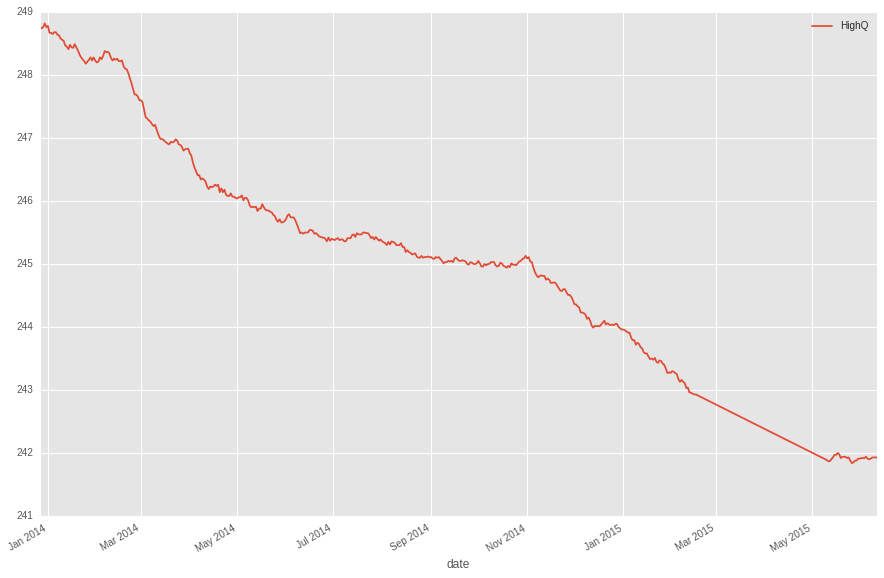

In [7]:
# Plot
df_cal.plot(x = "date", y = "HighQ")

In [8]:
# Set index as date - this is important to get the labels in the plots automatically
df_cal.index = df_cal.date
df_cal.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
date,,,,,,,,,
2013-12-27,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,2013
2013-12-28,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,2013
2013-12-29,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,2013
2013-12-30,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,2013
2013-12-31,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,2013


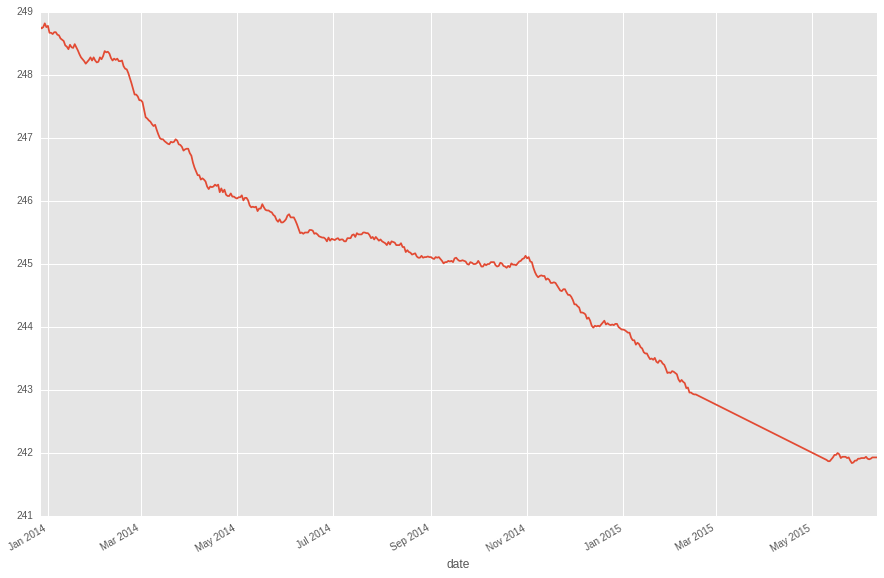

In [9]:
# Lets plot the HighQ prices
df_cal.HighQ.plot()

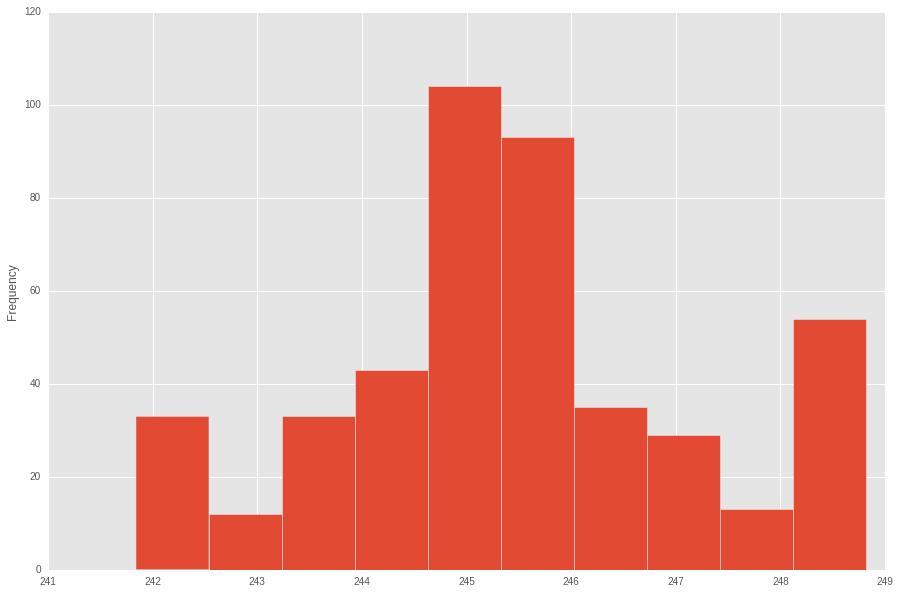

In [10]:
# Lets plot this HighQ as a histogram to see the most common price
df_cal.HighQ.plot(kind = "hist")

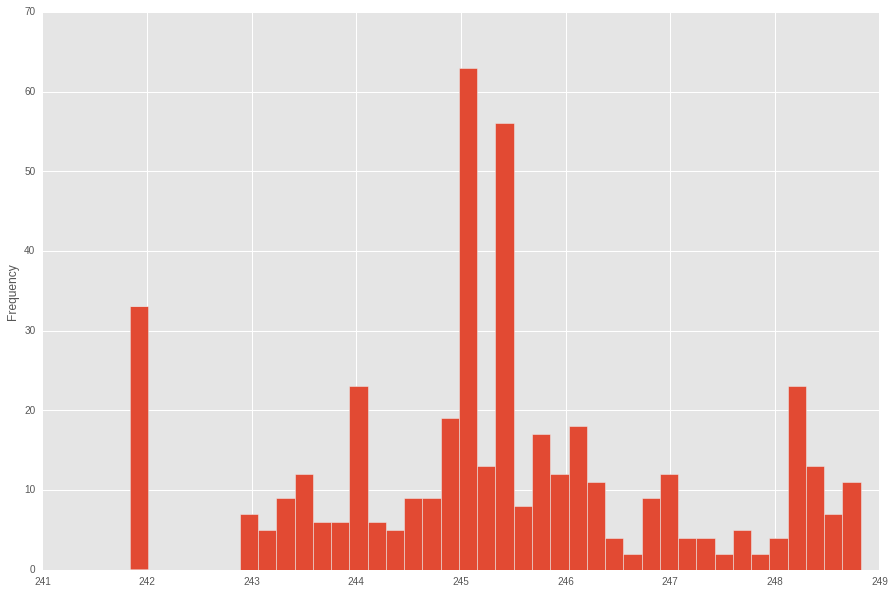

In [11]:
# Lets increase the bins to see some granularity
df_cal.HighQ.plot(kind = "hist", bins = 40)

## 3.2 Quantiative - Multi Variable

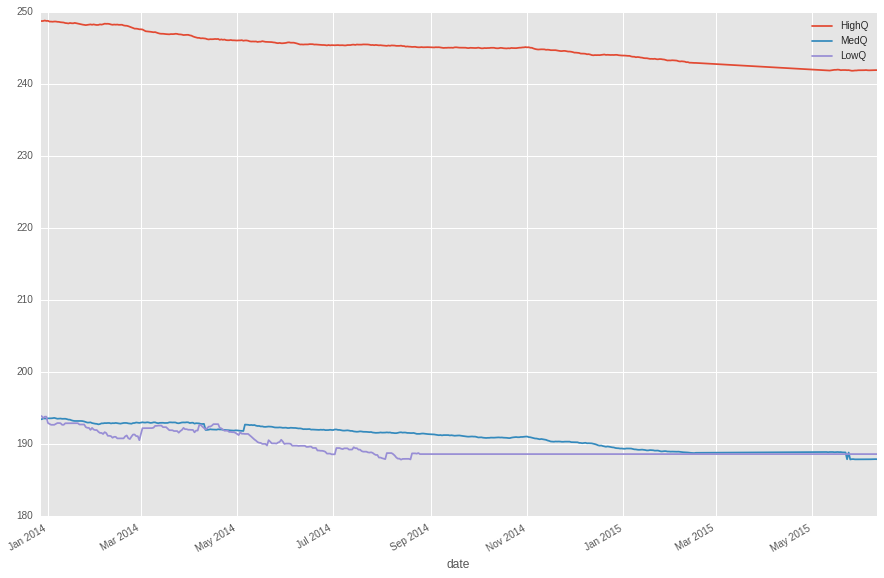

In [12]:
# Lets plot all the three prices in California
df_cal[["HighQ", "MedQ", "LowQ"]].plot()

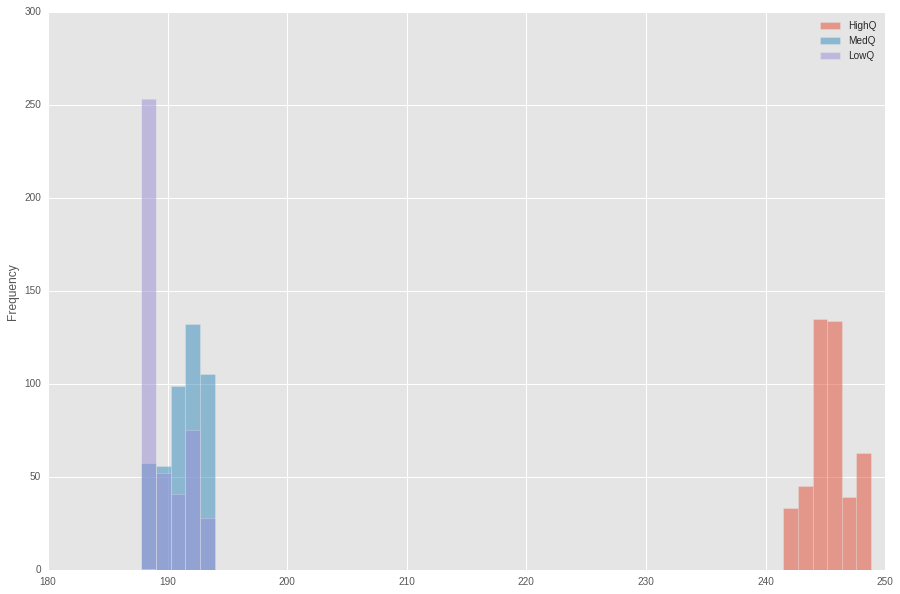

In [13]:
# Lets see the distribution of these prices by using a histogram
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "hist", bins = 50, alpha = 0.5)

### Exercise 

Filter the data for 2014 and Alaska

Plot the HighQ, MedQ and LowQ prices for Alaska in 2014

Plot the histogram of HighQ, MedQ and LowQ prices for Alaska in 2014

### Box Plots

In [14]:
# Lets plot a box plot for the HighQ, MedQ and LowQ
df_cal.describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,year
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,245.376125,14947.073497,191.268909,16769.821826,189.783586,976.298441,2014.167038
std,1.727046,1656.133565,1.524028,2433.943191,1.598252,120.246714,0.402204
min,241.840000,12021.000000,187.850000,12724.000000,187.830000,770.000000,2013.000000
25%,244.480000,13610.000000,190.260000,14826.000000,188.600000,878.000000,2014.000000
50%,245.310000,15037.000000,191.570000,16793.000000,188.600000,982.000000,2014.000000
75%,246.220000,16090.000000,192.550000,18435.000000,191.320000,1060.000000,2014.000000
max,248.820000,18492.000000,193.630000,22027.000000,193.880000,1232.000000,2015.000000


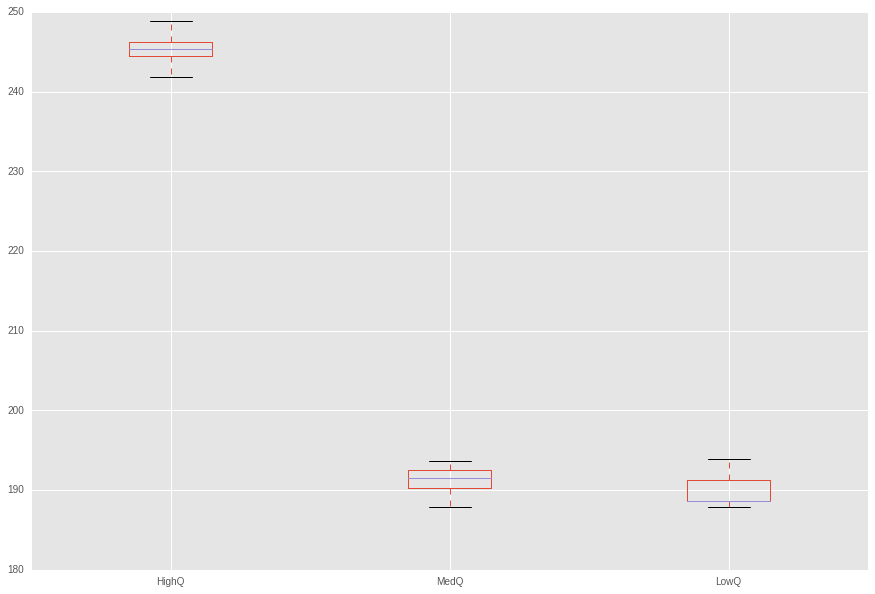

In [15]:
# Lets plot a Box Plot for the prices
df_cal[["HighQ", "MedQ", "LowQ"]].plot(kind = "box")

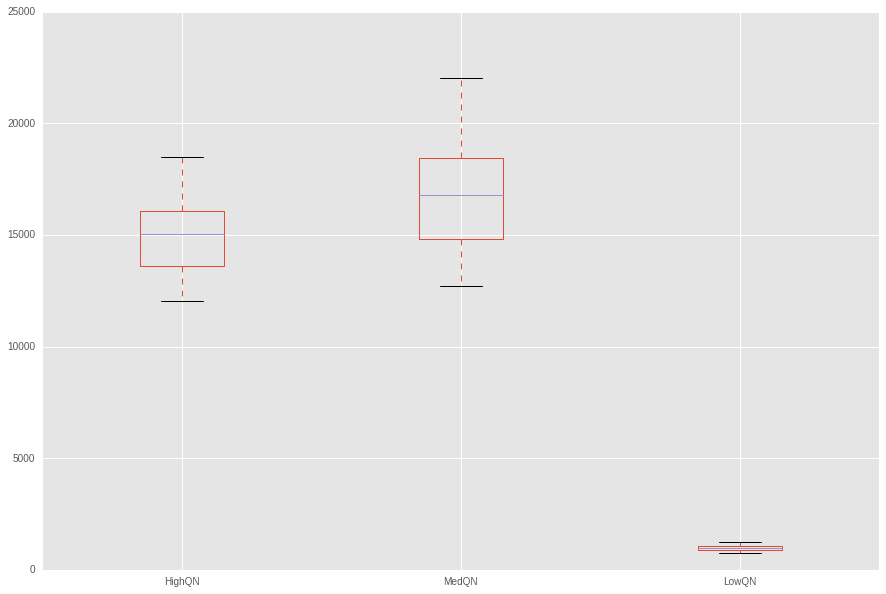

In [16]:
# Lets plot a Box Plot for the sample size
df_cal[["HighQN", "MedQN", "LowQN"]].plot(kind = "box")

**What if we want to show the price in all the states in the year 2014?**

In [17]:
# Select only the year 2014
df_2014 = df[df["year"] == 2014]
df_2014.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,2014
765,Alabama,339.20,1043,198.64,933,149.49,123,2014-01-02,2014
1479,Alabama,339.20,1043,198.64,933,148.48,124,2014-01-03,2014
2244,Alabama,339.20,1043,198.43,934,148.48,124,2014-01-04,2014
3009,Alabama,339.32,1046,198.13,936,148.48,124,2014-01-05,2014


In [18]:
# Lets use pivot tables to get HighQ values for each Date by each State
df_states = pd.pivot_table(df_2014, values = "HighQ", index = "date", columns = "State")
df_states.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,339.06,288.75,303.31,361.85,248.78,236.31,347.90,373.18,352.26,306.43,...,387.8,359.75,343.33,291.54,379.88,374.01,236.03,360.80,357.99,355.90
2014-01-02,339.20,289.67,303.36,361.85,248.67,236.20,347.84,373.18,352.02,306.35,...,387.8,359.75,343.35,291.70,379.88,373.62,236.13,359.80,358.19,355.90
2014-01-03,339.20,289.14,303.31,361.37,248.67,236.31,347.89,373.18,351.40,306.21,...,387.8,359.84,343.26,291.61,379.76,373.77,236.03,360.72,358.08,354.03
2014-01-04,339.20,289.14,303.22,361.21,248.65,236.07,347.89,373.35,351.40,306.11,...,387.8,359.74,343.23,291.78,379.76,373.72,236.03,361.11,358.04,354.03
2014-01-05,339.32,289.14,303.22,361.21,248.68,236.14,347.79,373.35,352.18,306.12,...,387.8,359.68,343.14,291.56,379.76,373.77,235.97,361.11,358.18,354.03


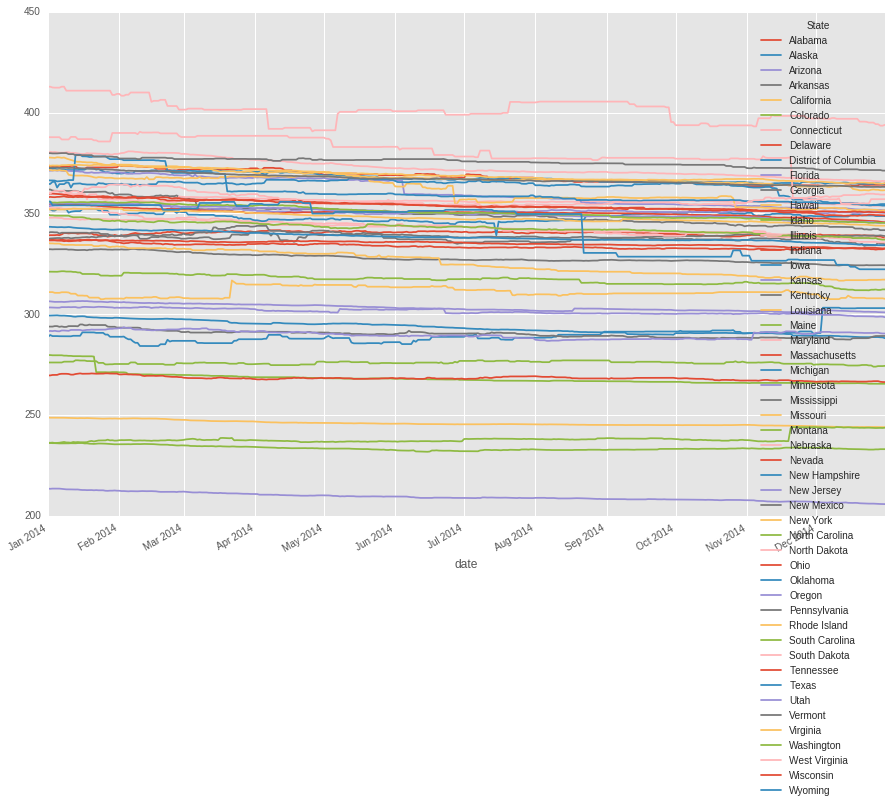

In [19]:
# Lets plot of these lines
df_states.plot()

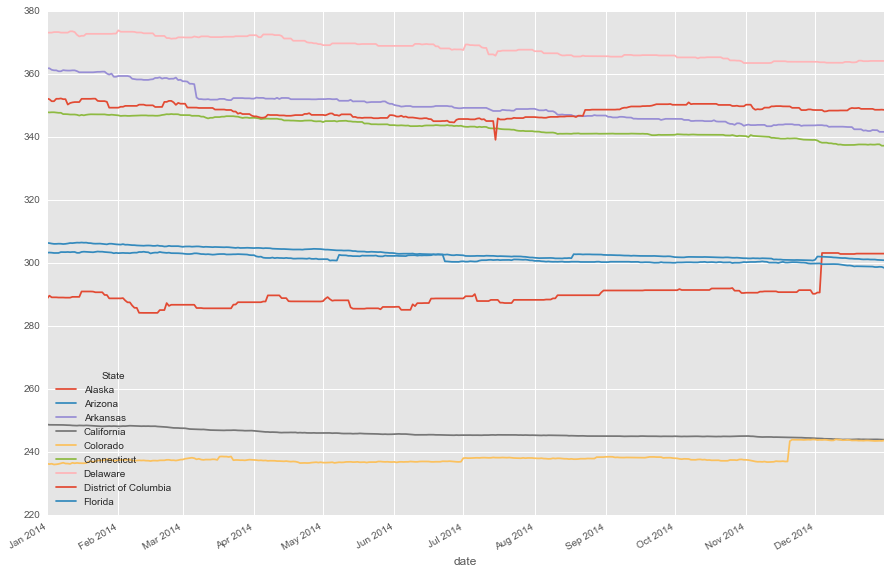

In [25]:
df_states.iloc[:,1:10].plot()

In [26]:
# What if we group by State and plot
# df_2014.groupby("State").plot(x = "date", y = "HighQ")

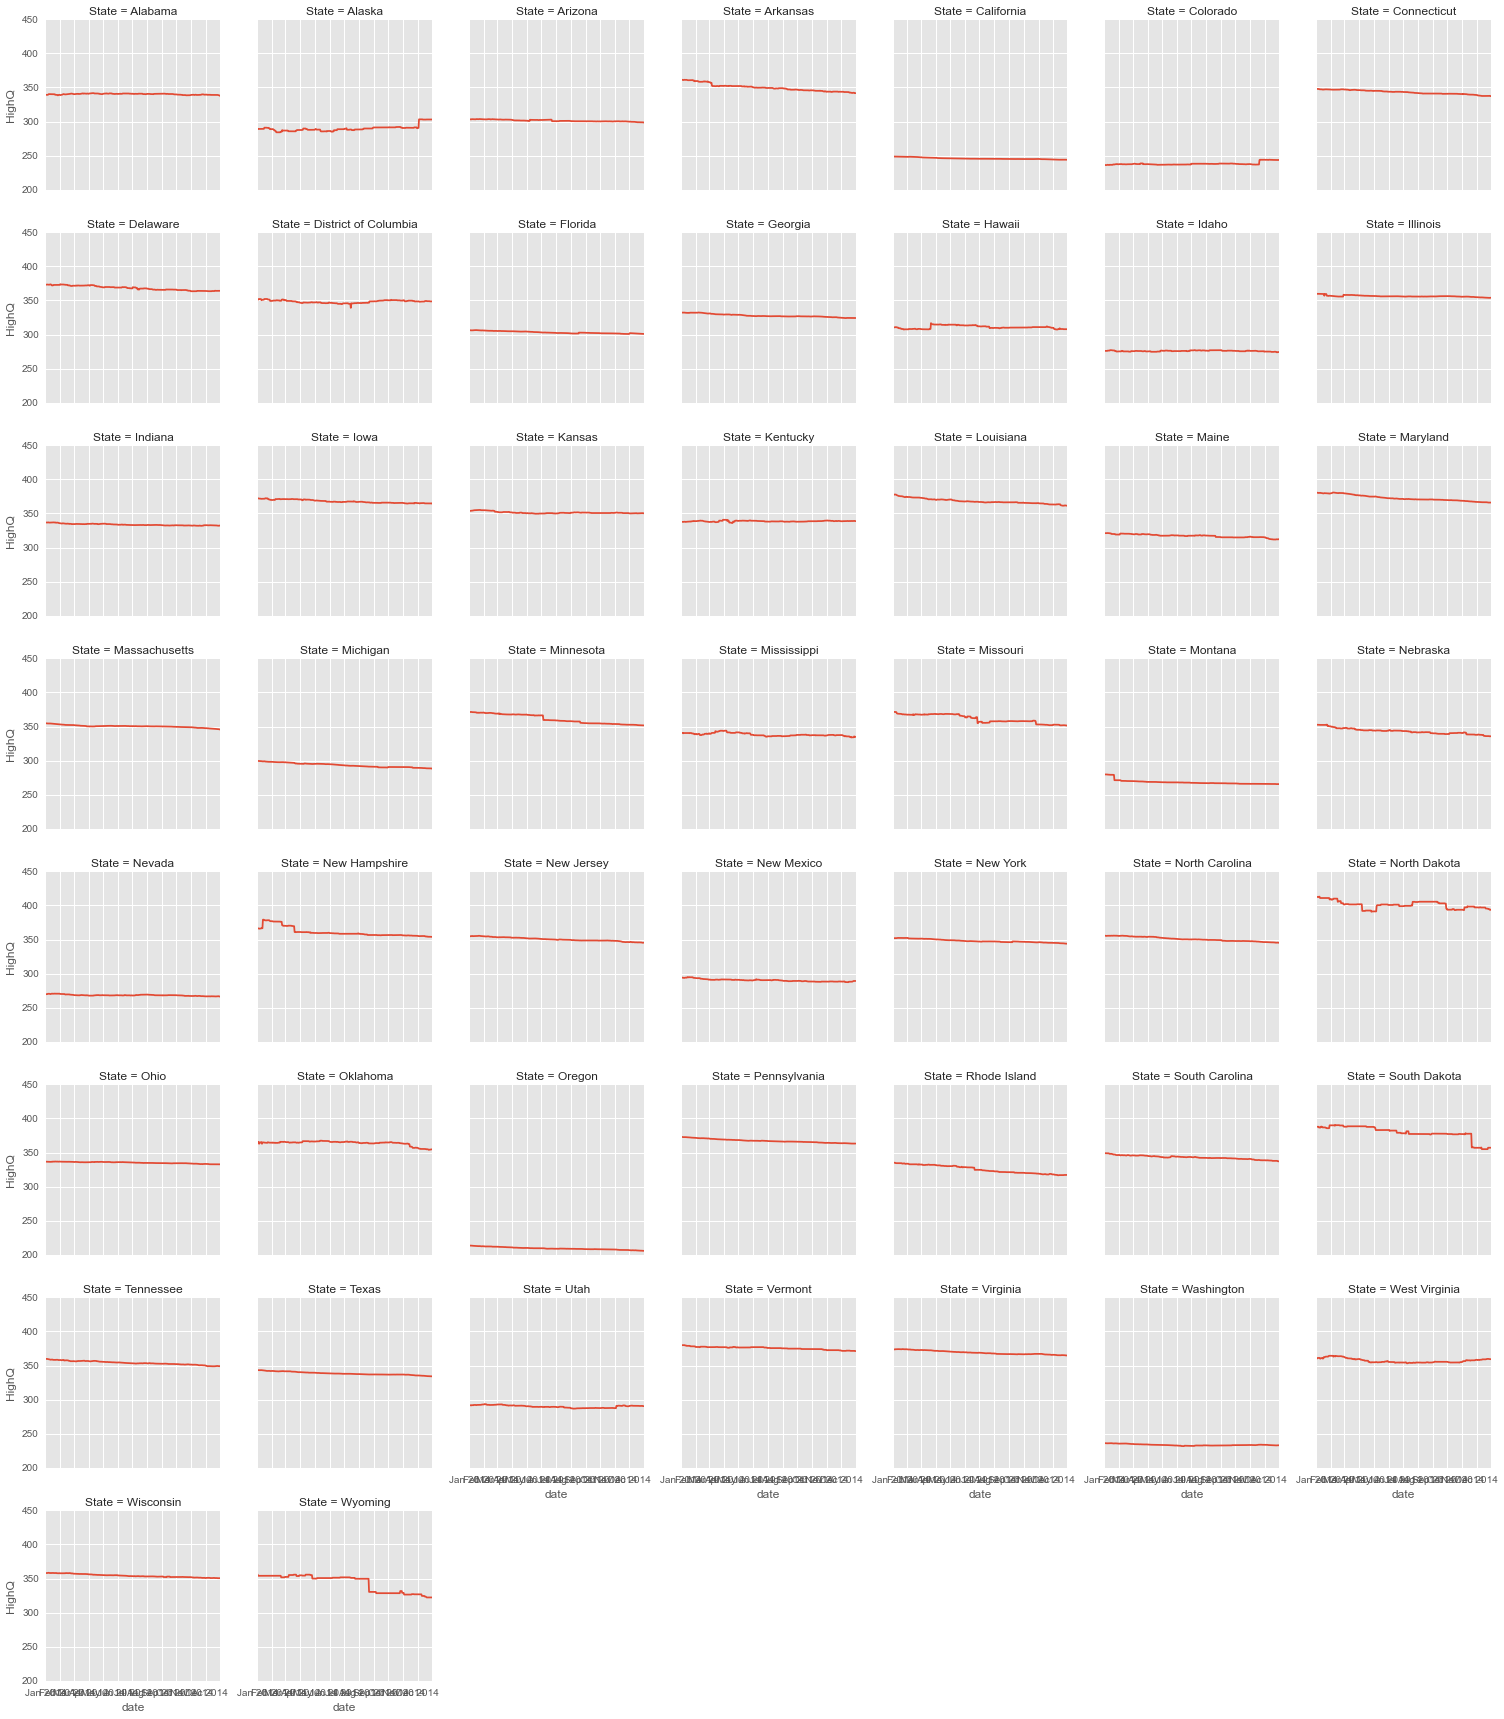

In [27]:
# Arrange in a grid fashion
grid = sns.FacetGrid(df_2014, col = "State", col_wrap = 7)
grid.map(plt.plot, "date", "HighQ")

## 3.3 Single Variable - Categorical

In [28]:
df_demo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [29]:
# Create an index in the demographic data to ease the labels 
df_demo.index = df_demo.region
df_demo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
region,,,,,,,,,
alabama,alabama,4799277,67,26,1,4,23680,501,38.1
alaska,alaska,720316,63,3,5,6,32651,978,33.6
arizona,arizona,6479703,57,4,3,30,25358,747,36.3
arkansas,arkansas,2933369,74,15,1,7,22170,480,37.5
california,california,37659181,40,6,13,38,29527,1119,35.4


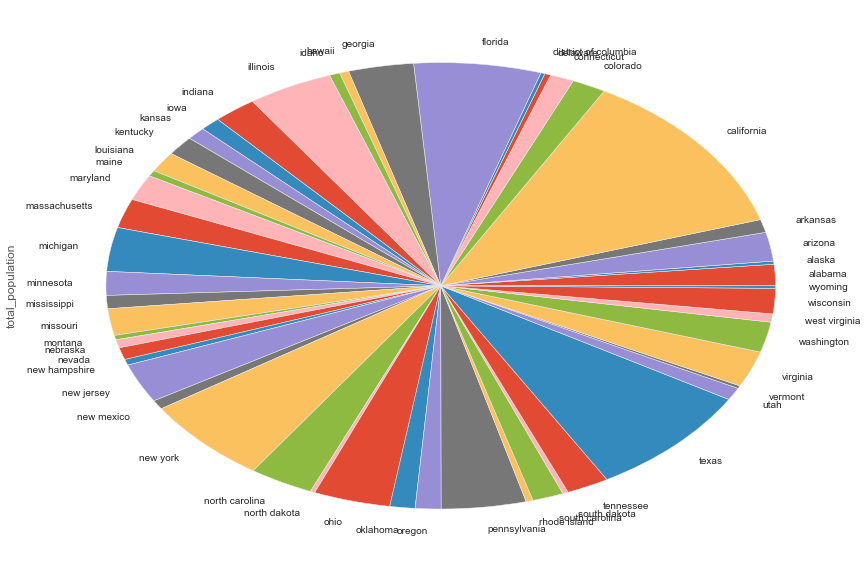

In [30]:
# DO NOT make pie charts, especially when the number of category is greater than 6
df_demo.total_population.plot(kind = "pie")

### Exercise

Draw a pie chart of the total population of the six largest states in US?

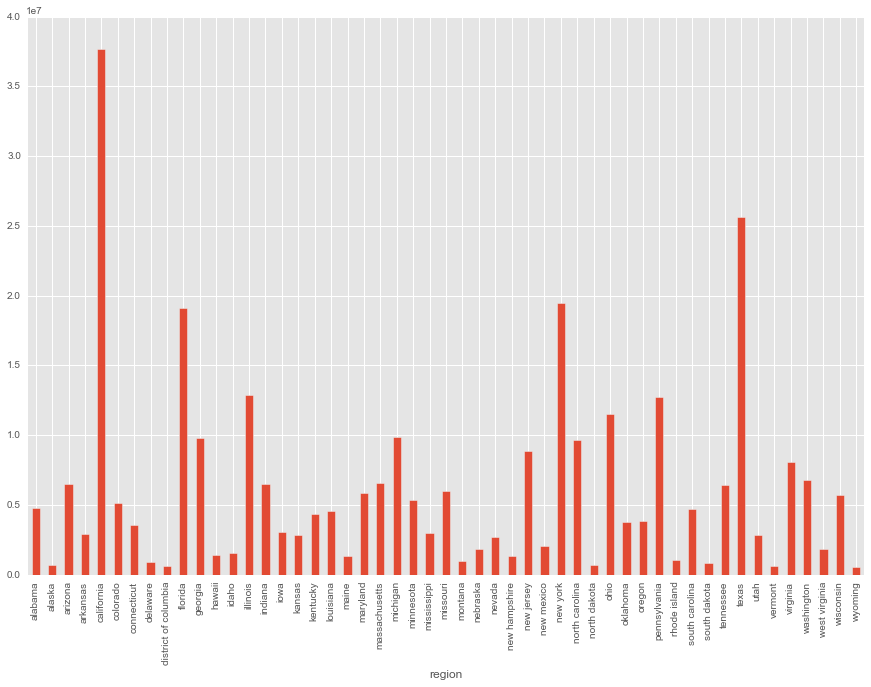

In [31]:
# Lets plot this in a simple bar chart
df_demo.total_population.plot(kind ="bar")

In [32]:
# Lets sort the columns to make them in ascending order
df_demo.sort(columns = 'total_population', ascending = True, inplace = True)
df_demo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
region,,,,,,,,,
wyoming,wyoming,570134,85,1,1,9,28902,647,36.8
district of columbia,district of columbia,619371,35,49,3,10,45290,1154,33.8
vermont,vermont,625904,94,1,1,2,29167,754,42.0
north dakota,north dakota,689781,88,1,1,2,29732,564,36.4
alaska,alaska,720316,63,3,5,6,32651,978,33.6


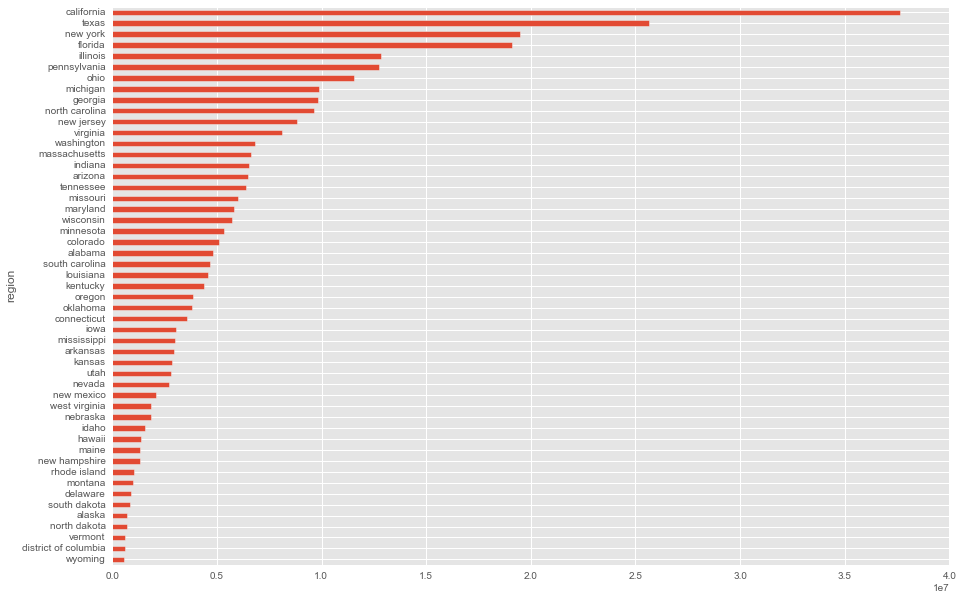

In [33]:
# Lets now plot again 
df_demo.total_population.plot(kind = "barh")

In [34]:
# Lets select the percent population
df_demo.iloc[:,2:6].head()

,percent_white,percent_black,percent_asian,percent_hispanic
region,,,,
wyoming,85,1,1,9
district of columbia,35,49,3,10
vermont,94,1,1,2
north dakota,88,1,1,2
alaska,63,3,5,6


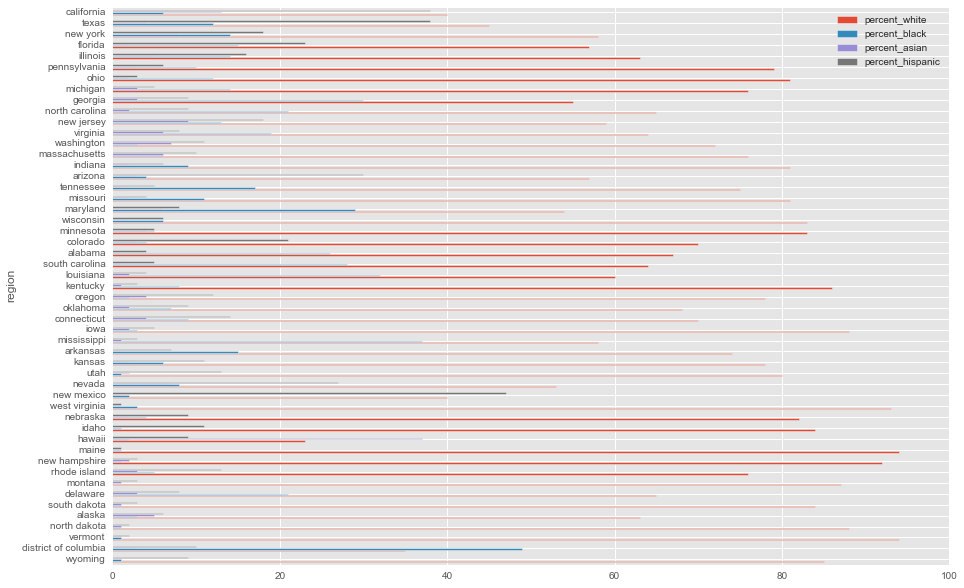

In [35]:
# Lets plot the percentage population
df_demo.iloc[:,2:6].plot(kind = "barh")

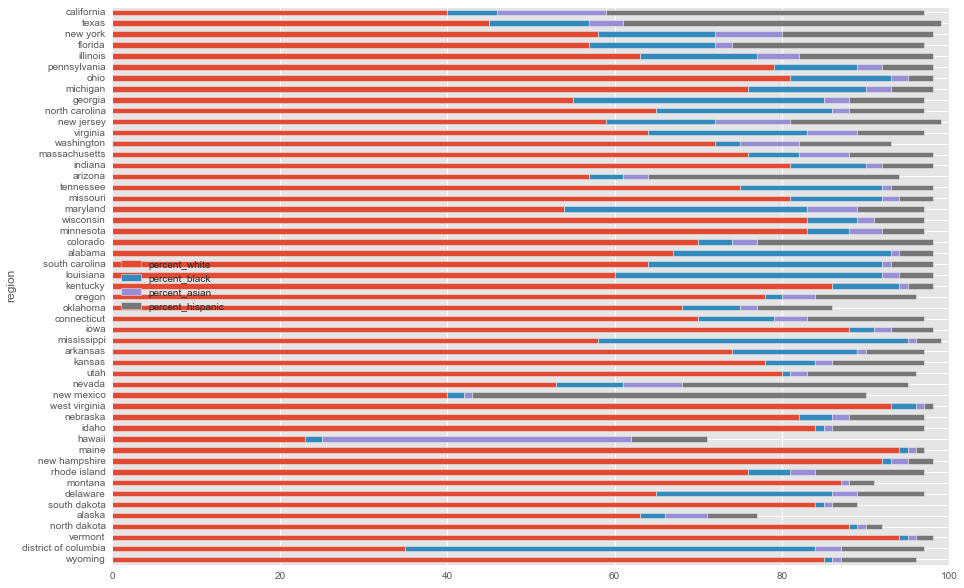

In [36]:
# Lets stack the percentage population
df_demo.iloc[:,2:6].plot(kind = "barh", stacked = True)

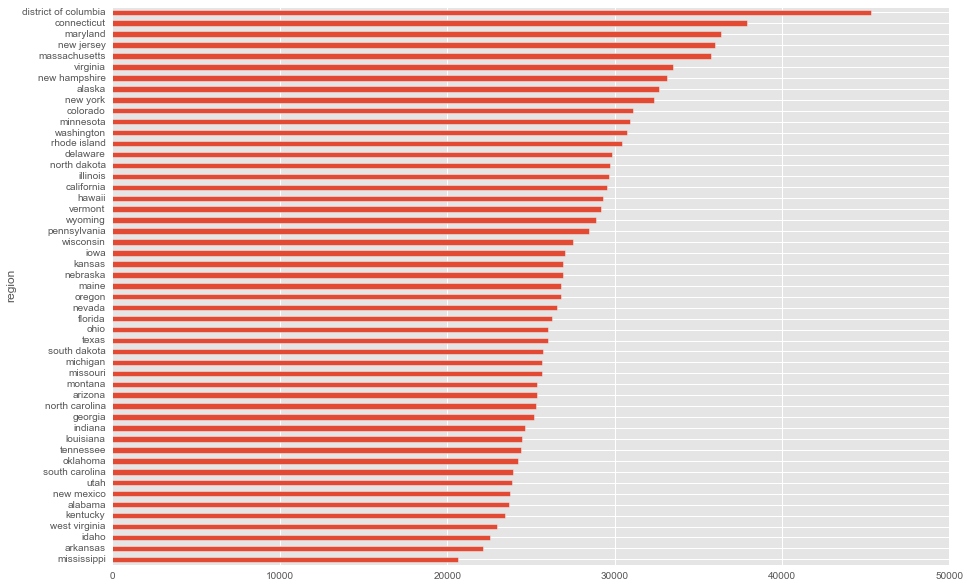

In [37]:
# Lets plot the Per Capita Income 
df_demo.sort(columns='per_capita_income', ascending=True).per_capita_income.plot(kind = "barh")

### Lets see if there is a relationship between per_capita_income and percent_white

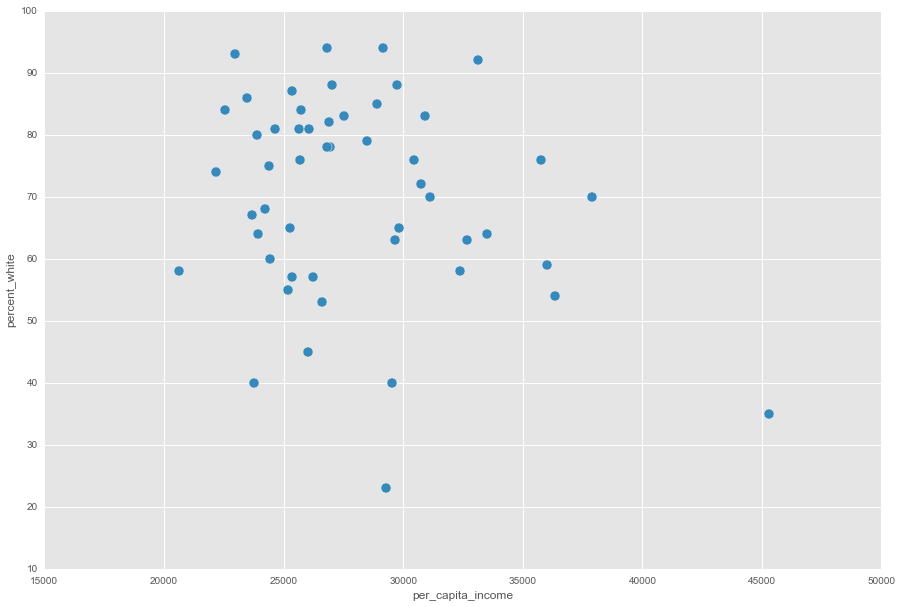

In [38]:
# Scatter - per_capita_income and percent_white
df_demo.plot(kind = "scatter", x = "per_capita_income", y = "percent_white", s = 100)

### Generate hypothesis on demographic data

Is there a reltaionship between per_capita_income and percentage of others?

Is there a relationship between median_age and percentage of asians?

### Lets plot in the Geographic Coordinates (without using maps)

In [20]:
# Lets get the latitude and longitude for each of the state
df_geo = pd.read_csv("data/State_Location.csv")
df_geo.head()

,region,state,latitude,longitude,status
0,alaska,AK,61.3850,-152.2683,legal
1,alabama,AL,32.7990,-86.8073,medical-limited
2,arkansas,AR,34.9513,-92.3809,illegal
3,arizona,AZ,33.7712,-111.3877,medical
4,california,CA,36.1700,-119.7462,decriminalized+medical


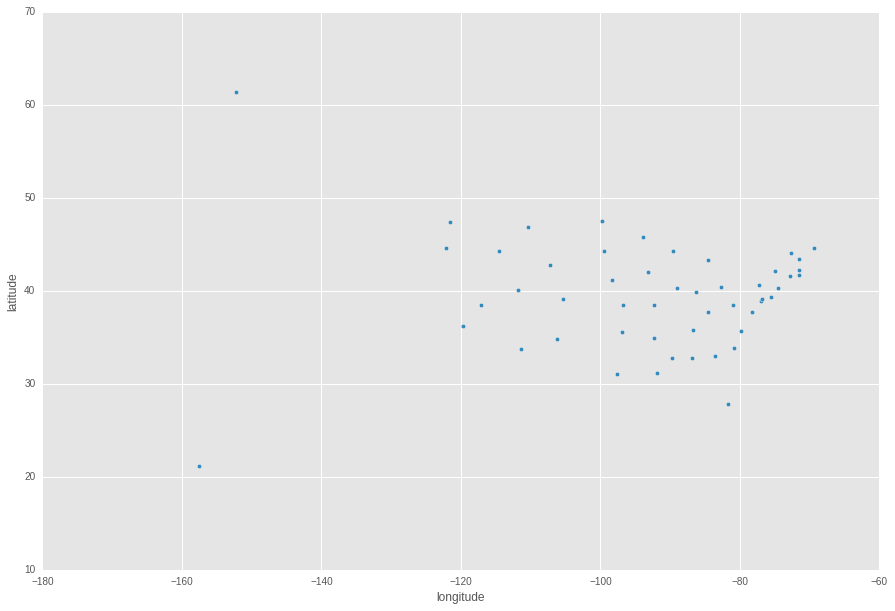

In [21]:
# Lets draw the states as a point
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude")

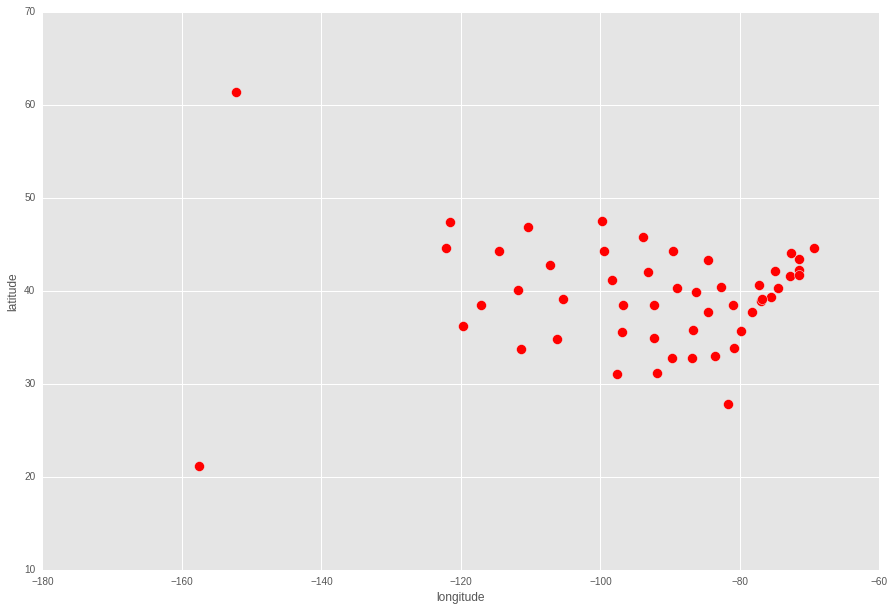

In [22]:
# Lets change the color of the dot and increase the size
df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100)

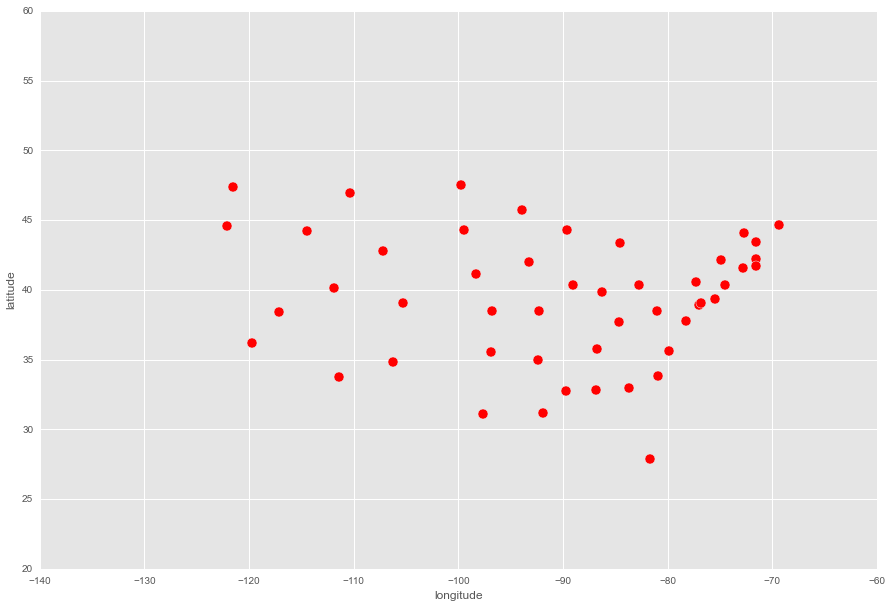

In [42]:
# Lets zoom in to the mainland USA

df_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "red", s = 100,
            xlim = (-140,-60), ylim = (20,60))

In [43]:
# Lets plot some data on this plot
df_demo_geo = pd.merge(df_demo, df_geo, on = "region")
df_demo_geo.index = df_demo_geo.region
df_demo_geo.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age,state,latitude,longitude,status
region,,,,,,,,,,,,,
wyoming,wyoming,570134,85,1,1,9,28902,647,36.8,WY,42.7475,-107.2085,illegal
district of columbia,district of columbia,619371,35,49,3,10,45290,1154,33.8,DC,38.8964,-77.0262,legal
vermont,vermont,625904,94,1,1,2,29167,754,42.0,VT,44.0407,-72.7093,decriminalized+medical
north dakota,north dakota,689781,88,1,1,2,29732,564,36.4,ND,47.5362,-99.7930,illegal
alaska,alaska,720316,63,3,5,6,32651,978,33.6,AK,61.3850,-152.2683,legal


In [44]:
df_demo_geo.index = df_demo_geo.region
df_demo_geo.iloc[:,10:12].head()

,latitude,longitude
region,,
wyoming,42.7475,-107.2085
district of columbia,38.8964,-77.0262
vermont,44.0407,-72.7093
north dakota,47.5362,-99.7930
alaska,61.3850,-152.2683


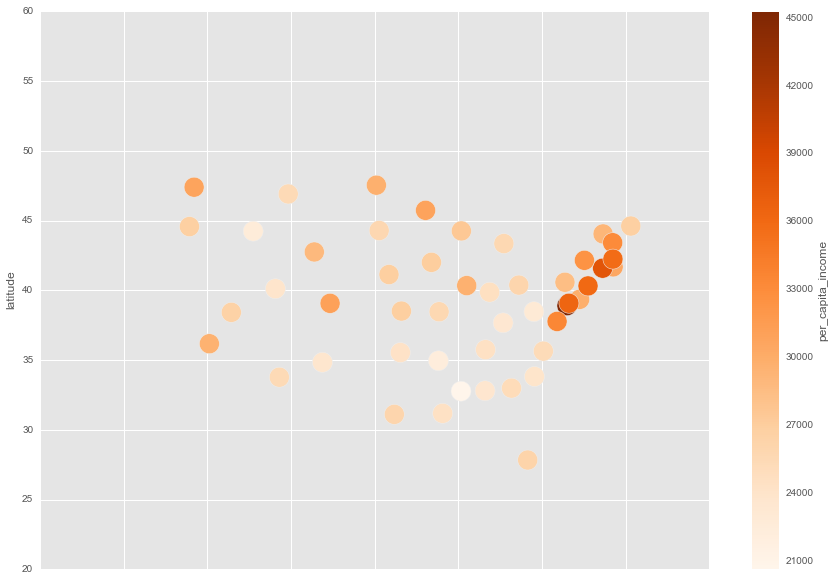

In [45]:
# Lets draw a scatter plot
df_demo_geo.plot(kind = "scatter", x = "longitude", y = "latitude", c = "per_capita_income", s = 400,
                 xlim = (-140,-60), ylim = (20,60), colormap = "Oranges")

### Exercise

Draw a scatterplot of latitude and longitude with color as median age. 

### Lets plot it on a true geographic system using folium 

In [23]:
from IPython.display import HTML
import folium

# Temporary code to embed in Jupyter Notebook  - will be fixed in version 0.16
def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

ImportError: No module named folium

In [47]:
map = folium.Map(location=[48, -102],  zoom_start= 4)
display(map)

In [ ]:
# Import a Geo JSON
state_geo = r'data/us-states.json'

In [ ]:
# Plot it as an overlay on the map
map = folium.Map(location=[48, -102], zoom_start=3)
map.geo_json(geo_path = state_geo)
display(map)

In [ ]:
# Lets bind some data to this
df_demo_geo.sort("region", inplace = True)
df_demo_geo.head()

In [ ]:
mapa = folium.Map(location=[48, -102], zoom_start=3)

mapa.geo_json(geo_path=state_geo, 
              data=df_demo_geo,
              columns=['state', 'total_population'],
              fill_color='BuPu',
              key_on='feature.id', reset = True)

# We will not use inline version due to bug in 0.15.0

mapa.create_map()

# Go to http://localhost:8888/files/map.html

### Exercise

Create a choropleth using the per_capita_income status